In [1]:
!pip install mysql-connector-python
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
connection=mysql.connector.connect(
host="localhost",
database="banking_case",
user="root",
password="SE/2021/023"
)


In [3]:
qry="select * from  banking_case.customer;"

In [4]:
df=pd.read_sql(qry,connection)
connection.close()

In [5]:
df.head(5)

,ï»¿Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5


In [12]:
df.info

<bound method DataFrame.info of      ï»¿Client ID              Name  Age  Location ID Joined Bank  \
0        IND81288     Raymond Mills   24        34324  06-05-2019   
1        IND65833     Julia Spencer   23        42205  10-12-2001   
2        IND47499    Stephen Murray   27         7314  25-01-2010   
3        IND72498    Virginia Garza   40        34594  28-03-2019   
4        IND60181   Melissa Sanders   46        41269  20-07-2012   
...           ...               ...  ...          ...         ...   
2995     IND66827         Earl Hall   82         8760  09-10-2014   
2996     IND40556  Billy Williamson   44        32837  05-02-2009   
2997     IND72414      Victor Black   70        36088  29-12-2009   
2998     IND46652       Andrew Ford   56        24871  13-02-2006   
2999     IND40216        Amy Nguyen   79        38518  08-12-2005   

          Banking Contact Nationality                     Occupation  \
0          Anthony Torres    American           Safety Technician I

In [13]:
df.describe

<bound method NDFrame.describe of      ï»¿Client ID              Name  Age  Location ID Joined Bank  \
0        IND81288     Raymond Mills   24        34324  06-05-2019   
1        IND65833     Julia Spencer   23        42205  10-12-2001   
2        IND47499    Stephen Murray   27         7314  25-01-2010   
3        IND72498    Virginia Garza   40        34594  28-03-2019   
4        IND60181   Melissa Sanders   46        41269  20-07-2012   
...           ...               ...  ...          ...         ...   
2995     IND66827         Earl Hall   82         8760  09-10-2014   
2996     IND40556  Billy Williamson   44        32837  05-02-2009   
2997     IND72414      Victor Black   70        36088  29-12-2009   
2998     IND46652       Andrew Ford   56        24871  13-02-2006   
2999     IND40216        Amy Nguyen   79        38518  08-12-2005   

          Banking Contact Nationality                     Occupation  \
0          Anthony Torres    American           Safety Technician

In [9]:
df.shape

(3000, 25)

In [10]:
df['Estimated Income'].min()

15919.48

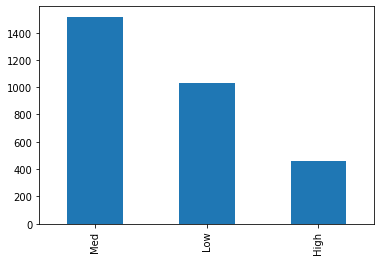

In [15]:
bins=[0,100000,300000,float('inf')]
labels=['Low','Med','High']
df['Income Band']=pd.cut(df['Estimated Income'],bins=bins,labels=labels)
df['Income Band'].value_counts().plot(kind='bar')


In [10]:
categorical_cols = ['Properties Owned', 'Risk Weighting', 'BRId', 'GenderId',
                    'IAId', 'Nationality', 'Occupation', 'Amount of Credit Cards',
                    'Fee Structure', 'Loyalty Classification']


for col in categorical_cols:
    print(f"\nValue counts for '{col}':")
    display(df[col].value_counts())



Value counts for 'Properties Owned':


2    777
1    776
3    742
0    705
Name: Properties Owned, dtype: int64


Value counts for 'Risk Weighting':


2    1222
1     836
3     460
4     322
5     160
Name: Risk Weighting, dtype: int64


Value counts for 'BRId':


3    1352
1     660
2     495
4     493
Name: BRId, dtype: int64


Value counts for 'GenderId':


2    1512
1    1488
Name: GenderId, dtype: int64


Value counts for 'IAId':


2     177
4     177
3     177
1     177
8     177
14    176
15    176
13    176
11    176
9     176
10    176
12    176
7      89
5      89
6      89
21     88
16     88
18     88
20     88
19     88
17     88
22     88
Name: IAId, dtype: int64


Value counts for 'Nationality':


European      1309
Asian          754
American       507
Australian     254
African        176
Name: Nationality, dtype: int64


Value counts for 'Occupation':


Structural Analysis Engineer    28
Associate Professor             28
Recruiter                       25
Human Resources Manager         24
Account Coordinator             24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: Occupation, Length: 195, dtype: int64


Value counts for 'Amount of Credit Cards':


1    1922
2     765
3     313
Name: Amount of Credit Cards, dtype: int64


Value counts for 'Fee Structure':


High    1476
Mid      962
Low      562
Name: Fee Structure, dtype: int64


Value counts for 'Loyalty Classification':


Jade        1331
Silver       767
Gold         585
Platinum     317
Name: Loyalty Classification, dtype: int64

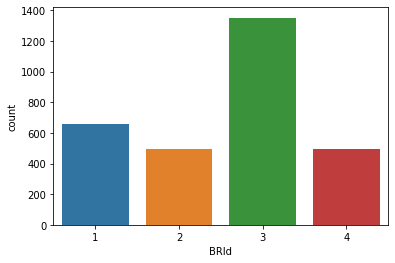

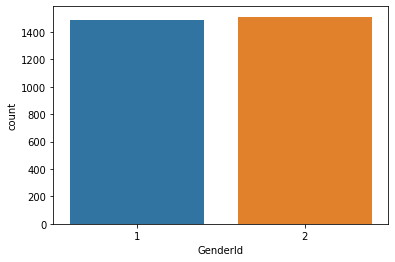

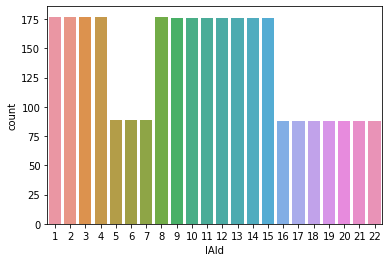

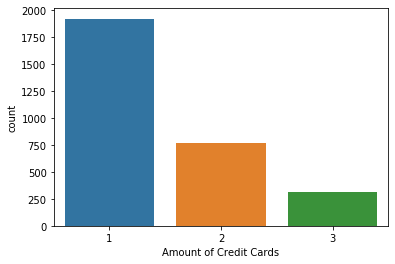

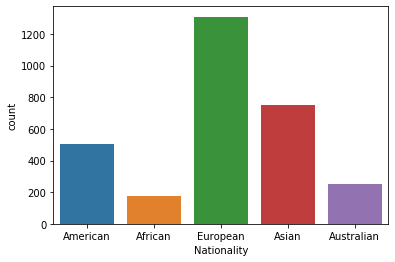

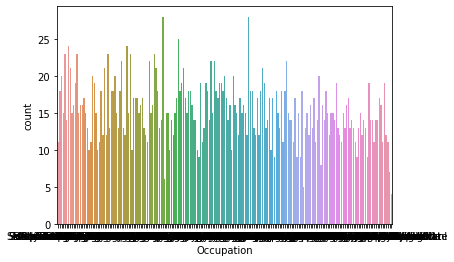

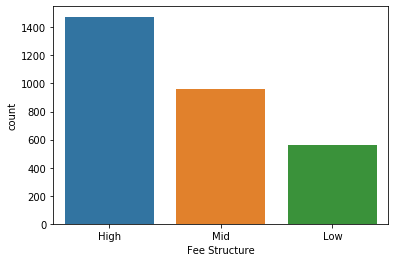

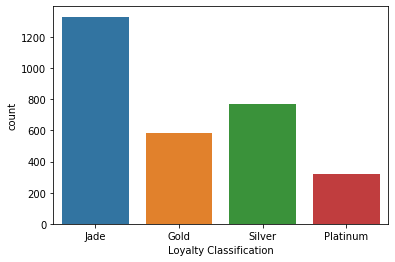

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
categorical_cols = ["BRId", "GenderId", "IAId", "Amount of Credit Cards","Nationality", "Occupation", "Fee Structure", "Loyalty Classification"]
for i, predictor in enumerate(categorical_cols):
    plt.figure(i)
    sns.countplot(data=df, x=predictor)

    
    


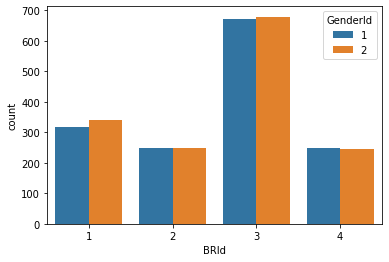

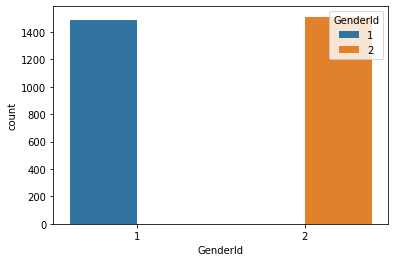

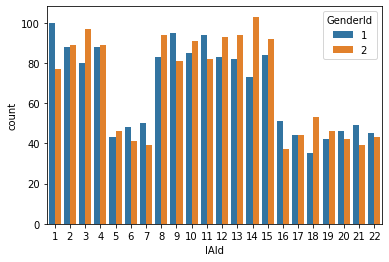

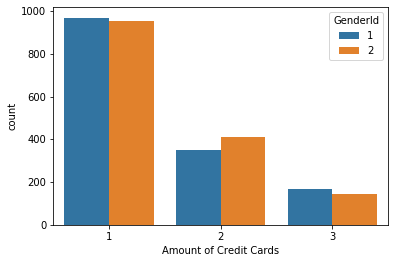

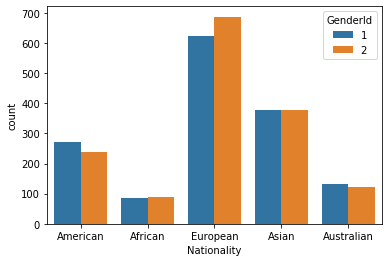

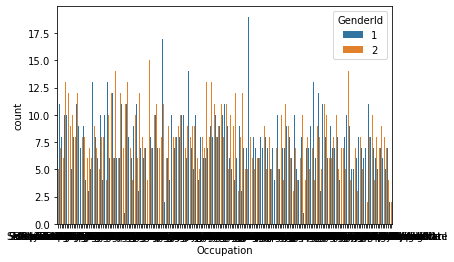

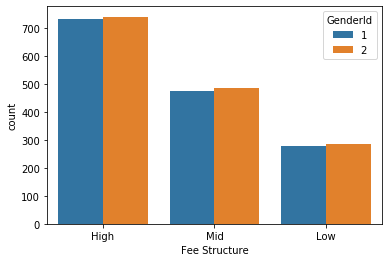

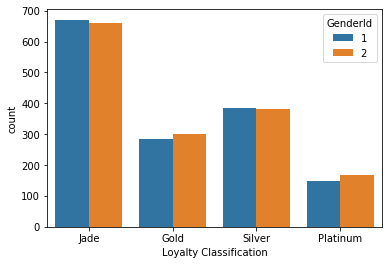

In [15]:
categorical_cols = ["BRId", "GenderId", "IAId", "Amount of Credit Cards","Nationality", "Occupation", "Fee Structure", "Loyalty Classification"]
for i, predictor in enumerate(categorical_cols):
    plt.figure(i)
    sns.countplot(data=df, x=predictor,hue='GenderId')

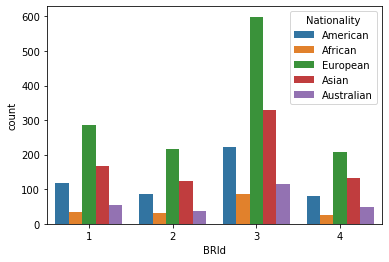

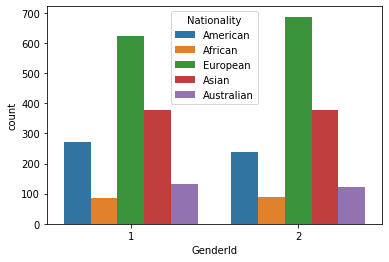

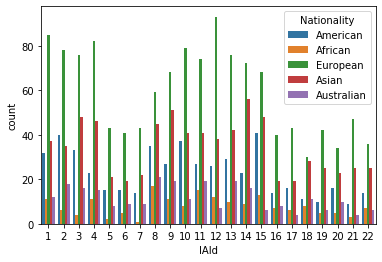

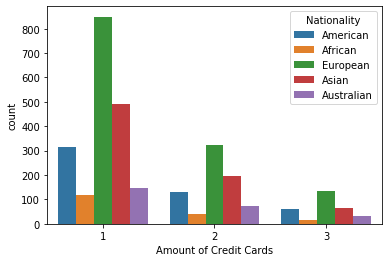

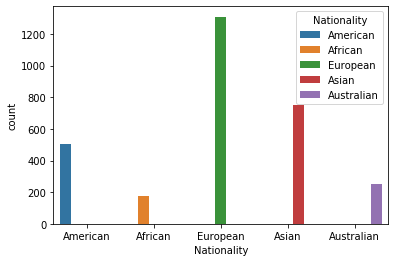

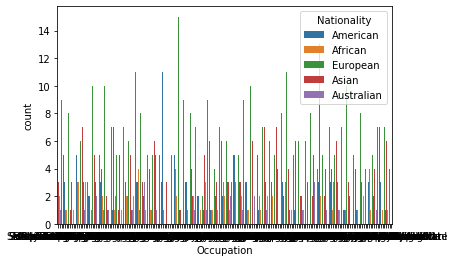

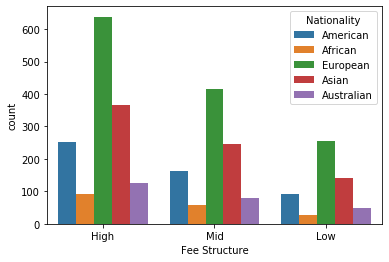

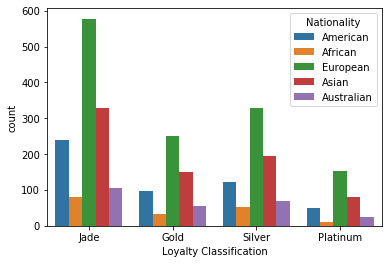

In [16]:
categorical_cols = ["BRId", "GenderId", "IAId", "Amount of Credit Cards","Nationality", "Occupation", "Fee Structure", "Loyalty Classification"]
for i, predictor in enumerate(categorical_cols):
    plt.figure(i)
    sns.countplot(data=df, x=predictor,hue='Nationality')

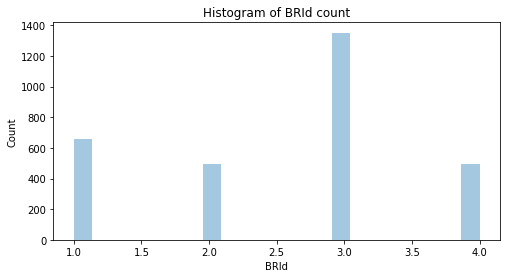

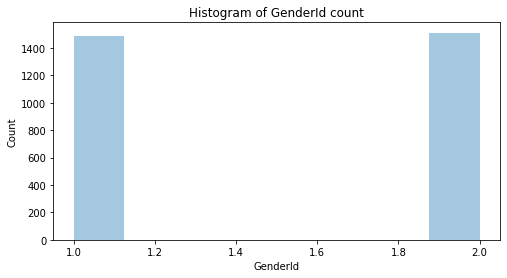

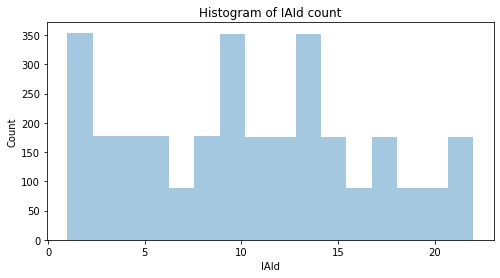

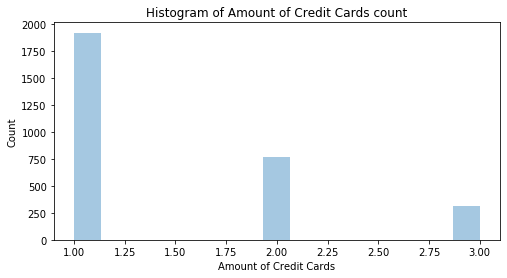

In [46]:
for col in categorical_cols:
    if col == "Occupation" or col=="Nationality" or col=="Fee Structure" or col=="Loyalty Classification":
        continue
    plt.figure(figsize=(8, 4))
    sns.distplot(df[col],kde=False) 
    plt.title(f'Histogram of {col} count')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

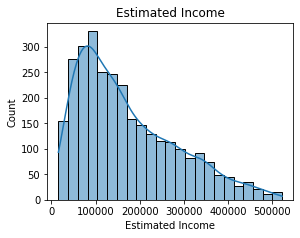

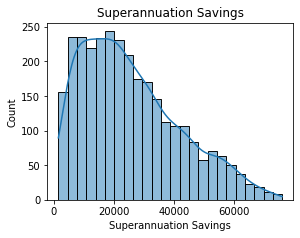

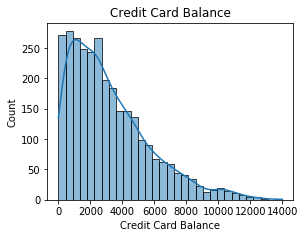

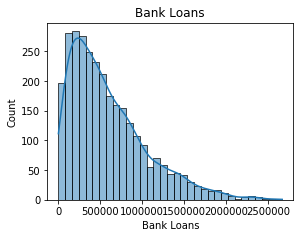

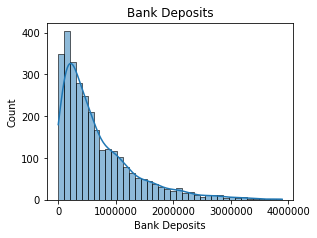

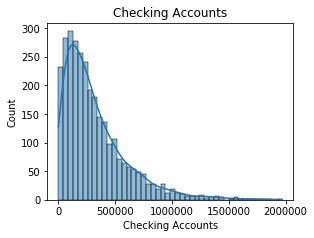

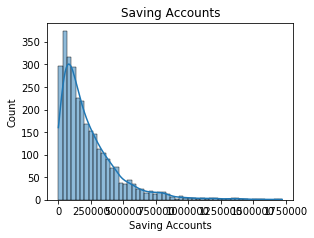

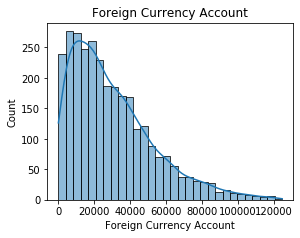

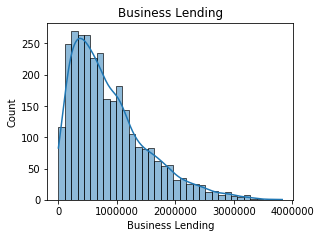

In [35]:
numerical_cols=['Estimated Income','Superannuation Savings','Credit Card Balance','Bank Loans','Bank Deposits','Checking Accounts','Saving Accounts','Foreign Currency Account','Business Lending']

for i,cols in enumerate(numerical_cols):
    plt.figure(figsize=(15,15))
    plt.subplot(4,3,i+1)
    sns.histplot(df[cols],kde=True)
    plt.title(cols)
    plt.show()

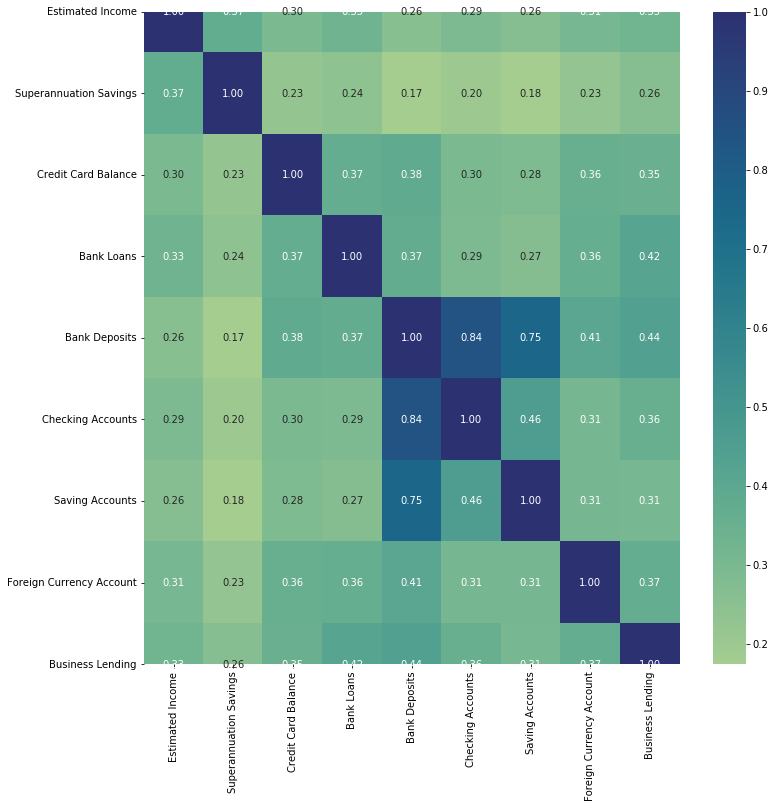

In [34]:
numerical_cols=['Estimated Income','Superannuation Savings','Credit Card Balance','Bank Loans','Bank Deposits','Checking Accounts','Saving Accounts','Foreign Currency Account','Business Lending']
correlation_matrix=df[numerical_cols].corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix,annot=True,cmap='crest',fmt='0.2f')
plt.show()